In [1]:
## Basic chatbot with langgraph
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages ##reducers
from langgraph.graph import MessagesState

In [3]:
class State(TypedDict):
    # Messages have the type "list".
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [4]:
graph_builder

In [5]:
from langchain_groq import ChatGroq


In [6]:
llm = ChatGroq(model="gemma2-9b-it")

In [7]:
## Node functionality
def chatbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}

In [8]:
graph_builder=StateGraph(State)
graph_builder.add_node("llmchatbot", chatbot)
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

# compile
graph = graph_builder.compile()

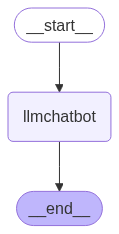

In [9]:
## Visualize
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [10]:
##how to run it
graph.invoke({"messages":"Hi"})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='f2892dfb-f512-46c8-9523-4ad8a683f1be'),
  AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 0.00117709, 'queue_time': 0.252896071, 'total_time': 0.028449817}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--cb045589-fff7-4924-96af-799fd812e18d-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})]}

In [11]:
## alternate initialization

def chatbot1(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"])]}

In [12]:
gb1=StateGraph(State)
gb1.add_node("llmchatbot1", chatbot1)
gb1.add_edge(START, "llmchatbot1")
gb1.add_edge("llmchatbot1", END)

# compile
graph1 = gb1.compile()

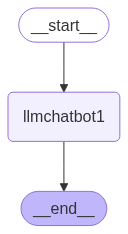

In [13]:
## Visualize
from IPython.display import Image, display

try:
    display(Image(graph1.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [14]:
graph1.invoke({"messages":"Hi"})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='a3a891c7-a992-4601-b9e3-fd14f6a24e2a'),
  AIMessage(content='Hi! 👋  How can I help you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 0.00117202, 'queue_time': 0.249641457, 'total_time': 0.026626565}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--32bcaf2c-078b-4495-b75c-4ed248f978f9-0', usage_metadata={'input_tokens': 10, 'output_tokens': 14, 'total_tokens': 24})]}

In [15]:
for event in graph.stream({"messages":"Hi, who is Trump?"}):
    for value in event.values():
        print(value["messages"][-1].content)

Donald John Trump is an American politician, media personality, and businessman who served as the 45th president of the United States from 2017 to 2021.

**Here are some key facts about him:**

* **Early Life and Business Career:** Born in Queens, New York, Trump inherited his father's real estate business and built a career in real estate development, hotels, and casinos. He became a prominent figure in New York City's elite circles.

* **Media Personality:** Trump gained national attention in the 1980s through his flamboyant lifestyle and appearances on television shows like "The Apprentice." He also owned several casinos and hotels.

* **Political Career:**
    * **2016 Presidential Election:** Trump ran for president as a Republican, campaigning on a populist platform that appealed to white working-class voters. He defeated Democratic nominee Hillary Clinton in a surprise victory.
    * **Presidency (2017-2021):** Trump's presidency was marked by controversy and polarization. His p

In [ ]:
@tool
def multi(a:int, b:int)-> int:
    """Multiply a and b

    Args:
        a(int): first int
        b(int): second int
    Returns:
        int: output int
    """
    return a*b


In [18]:
from langchain_core.tools import tool
from langgraph.types import interrupt, Command


@tool
def human_assistance(query:str) -> str:
    """request assistance from a human"""
    human_response=interrupt({"query": query})
    return human_response["data"]

In [19]:
human_response = ("we are here to help. checkout langgraph to build your agent")

human_command = Command(resume={"data": human_response})

events = graph.stream(human_command, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()


NameError: name 'config' is not defined